# 6.5 Machine Learning Part 2

1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clusterin

In [1]:
#Importing libraries and data and renaming columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
# importhing Dataframe 
df=pd.read_csv(r"C:\Users\bukola\Documents\CF\6.1 Sourcing Open Data\Prepared Data\Superstore_clean.csv")

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df1 = df.drop(['Unnamed: 0','Row ID','Ship Mode','Customer ID', 'Segment', 'Country', 'City', 'State',
     'Region', 'Product ID', 'Category', 'Sub-Category','Order ID', 'Ship Date','Order Date',
       'Product Name','Postal Code'], axis = 1)

In [7]:
df1

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [8]:
# Create a StandardScaler object
std_scaler = StandardScaler()

In [9]:
# Transform the numerical columns in the DataFrame using the fit_transform method
# Assuming df is your NumPy array
df1_scaled = StandardScaler().fit_transform(df1)


In [10]:
# Create a new DataFrame with the scaled values and the original column names
df1_scaled = pd.DataFrame(df1_scaled, columns=['Sales', 'Quantity', 'Discount', 'Profit'])

In [11]:
df1_scaled

,Sales,Quantity,Discount,Profit
0,0.051510,-0.804303,-0.756643,0.056593
1,0.805633,-0.354865,-0.756643,0.815054
2,-0.345368,-0.804303,-0.756643,-0.093002
3,1.167688,0.544012,1.423149,-1.757484
4,-0.332935,-0.804303,0.212153,-0.111593
...,...,...,...,...
9989,-0.328314,-0.354865,0.212153,-0.104821
9990,-0.221269,-0.804303,-0.756643,-0.055598
9991,0.046080,-0.804303,0.212153,-0.039546
9992,-0.321331,0.094574,-0.756643,-0.065473


In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\bukola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bukola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bukola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bukola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

In [14]:
score

[-4430069250.266417,
 -2466689485.4602656,
 -1444364350.9390104,
 -1009020181.7280388,
 -812146048.1495256,
 -658633111.6347631,
 -565222592.7986147,
 -463519389.5391556,
 -386760816.207652]

### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart

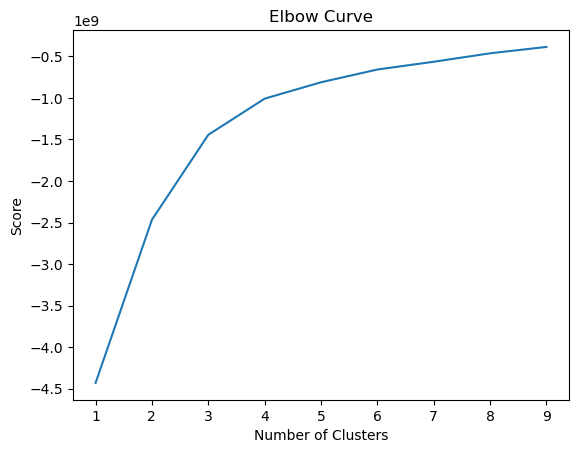

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####   there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

# 5. Run the k-means algorithm 

In [16]:
 # Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [17]:
# Fit the k-means object to the data.

kmeans.fit(df1_scaled)

C:\Users\bukola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
df1_scaled['clusters'] = kmeans.fit_predict(df1_scaled)

C:\Users\bukola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 6  Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [19]:
df1_scaled.head()

,Sales,Quantity,Discount,Profit,clusters
0,0.051510,-0.804303,-0.756643,0.056593,0
1,0.805633,-0.354865,-0.756643,0.815054,0
2,-0.345368,-0.804303,-0.756643,-0.093002,0
3,1.167688,0.544012,1.423149,-1.757484,2
4,-0.332935,-0.804303,0.212153,-0.111593,0


In [20]:
df1_scaled['clusters'].value_counts()

clusters
0    8779
2    1135
1      80
Name: count, dtype: int64

# 7 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

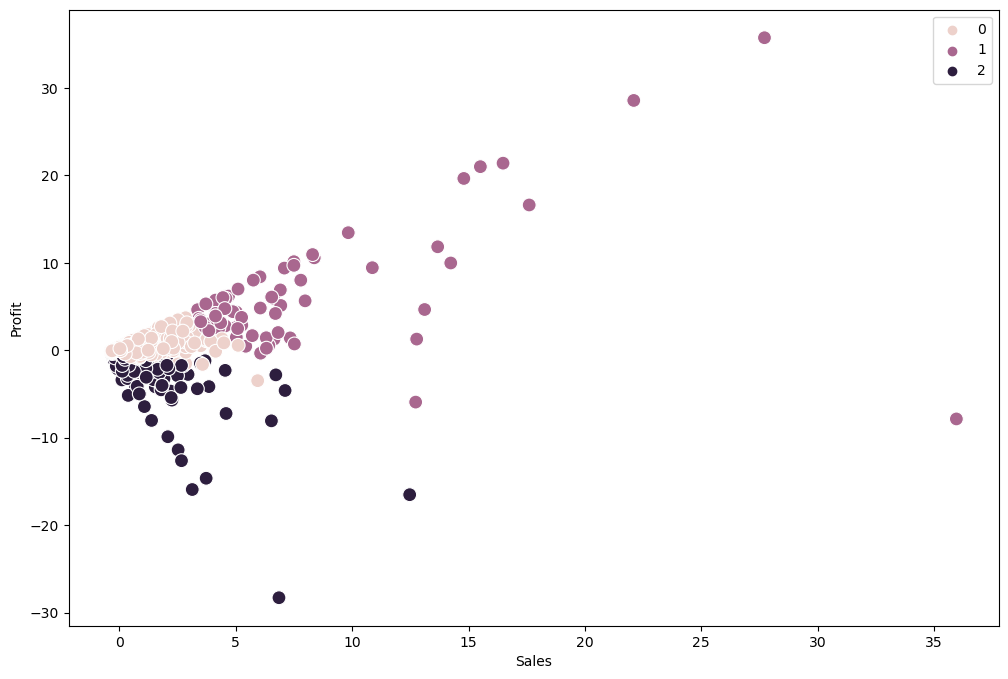

In [21]:
# Plot the clusters for the "Sales" and "profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1_scaled['Sales'], y=df1_scaled['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

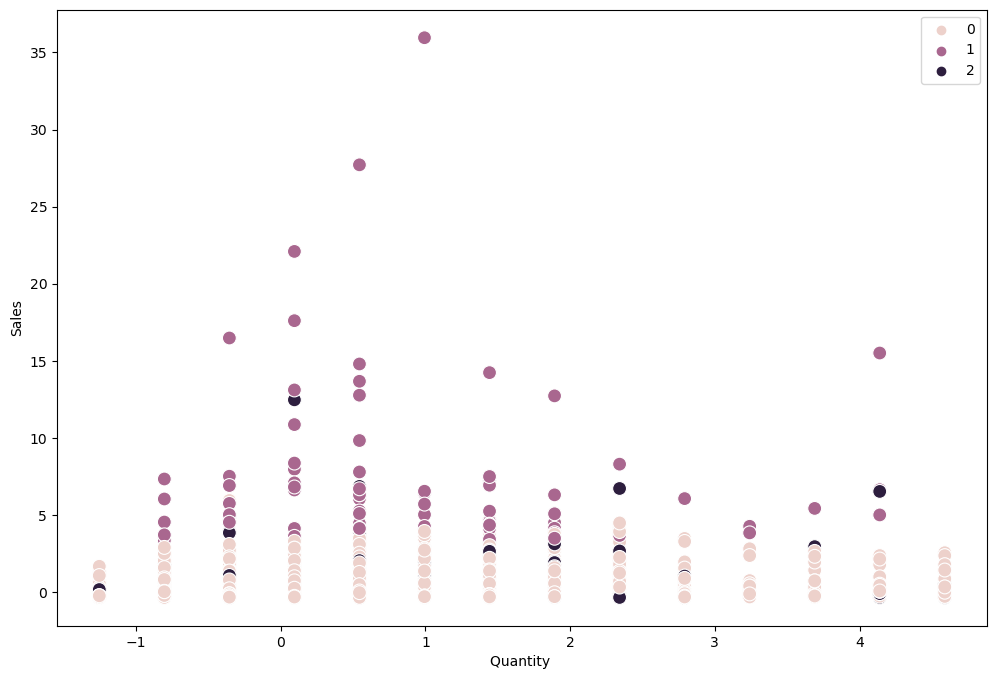

In [22]:
# Plot the clusters for the "Quantity" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1_scaled['Quantity'], y=df1_scaled['Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Quantity ') 
plt.ylabel('Sales')
plt.show()

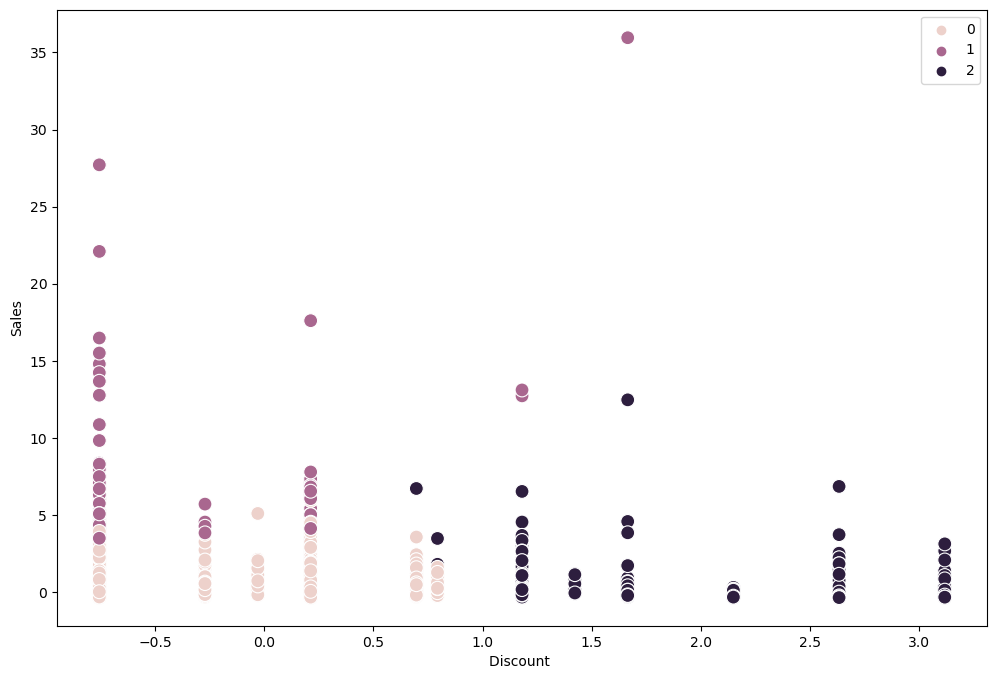

In [23]:
# Plot the clusters for the "Discount" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1_scaled['Discount'], y=df1_scaled['Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Discount ') 
plt.ylabel('Sales')
plt.show()

In [24]:
df1_scaled.loc[df1_scaled['clusters'] == 2, 'clusters'] = 'dark purple'
df1_scaled.loc[df1_scaled['clusters'] == 1, 'clusters'] = 'purple'
df1_scaled.loc[df1_scaled['clusters'] == 0, 'clusters'] = 'pink'

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further

    '0'  represents a cluster with lower sales and quantities, and moderate variability in offered discounts.
    '1' represents a cluster with moderate sales and quantities, and consistent low discounts.
    '2' represents a cluster with consistently high sales and quantities, and moderate variability in offered discounts.

# 9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [25]:
df1_scaled.groupby('clusters').agg({'Sales':['mean', 'median'], 
                         'Quantity':['mean', 'median'], 
                         'Discount':['mean', 'median']})

Sales            Quantity            Discount          
                 mean    median      mean    median      mean    median
clusters                                                               
dark purple -0.068408 -0.332550  0.044284 -0.354865  2.374192  2.634145
pink        -0.057656 -0.275581 -0.014676 -0.354865 -0.303641 -0.756643
purple       7.297572  5.340086  0.982215  0.544012 -0.363070 -0.756643

# 10 Propose what these results could be useful for in future steps of an analytics pipeline.


The descriptive statistics for different clusters provide valuable insights that can inform future steps in an analytics pipeline. Here are some potential uses of these results for further analysis:

Cluster 'dark purple':

Sales: Higher mean and median values, indicating relatively high sales.
Quantity: Mean and median are both high, suggesting a consistent higher quantity of items purchased.
Discount: Moderate mean discount with no median discount, indicating variability in offered discounts.

Cluster 'pink':
Sales: Much lower mean and median values compared to other clusters, indicating lower sales.
Quantity: Mean and median are lower, suggesting a lower quantity of items purchased.
Discount: Moderate mean discount with a higher median discount, indicating variability in offered discounts.

Cluster 'purple':
Sales: Moderate mean and median values, indicating moderate sales.
Quantity: Moderate mean and median, suggesting a moderate quantity of items purchased.
Discount: Low mean discount with a low median discount, indicating consistency in offered discounts.


In summary:
'dark purple' represents a cluster with consistently high sales and quantities, and moderate variability in offered discounts.
'pink' represents a cluster with lower sales and quantities, and moderate variability in offered discounts.
'purple' represents a cluster with moderate sales and quantities, and consistent low discounts.

I suggest that the obtained results hold significant potential for future steps focused on Profitability Analysis. This involves evaluating the profitability of each cluster by examining the interplay between sales, discounts, and quantities. By identifying clusters that make the most substantial contributions to overall profit, businesses can strategically prioritize and tailor their approaches for enhanced financial outcomes.